# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.linspace(1, 10, 100) # 1부터 10까지 100개의 숫자를 균일하게 생성

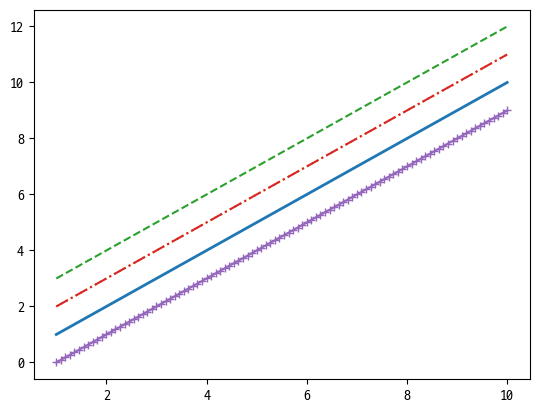

In [13]:
plt.plot(x, x, linewidth=2.0)       # 선의 굵기를 2.0으로 설정
plt.plot(x, x+1, linestyle=':')     # 점선(:)으로 그리기
plt.plot(x, x+2, linestyle='--')    # 파선(--)으로 그리기
plt.plot(x, x+1, linestyle='-.')    # 대쉬-닷선(-.)으로 그리기
plt.plot(x, x-1, marker='+')        # 마커(*) 모양으로 그리기

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'./data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [5]:
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


In [6]:
df_ = df.set_index('년도')
df_.rename(columns={r'최대농도(㎍/㎥/시)': '최대농도'}, inplace=True)
df_.head()

,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
년도,,,,,,
2006,4,5,1,2,11,2941
2007,3,4,1,1,12,1355
2008,1,1,1,1,11,933
2009,2,3,2,3,9,1157
2010,4,5,2,3,15,1354


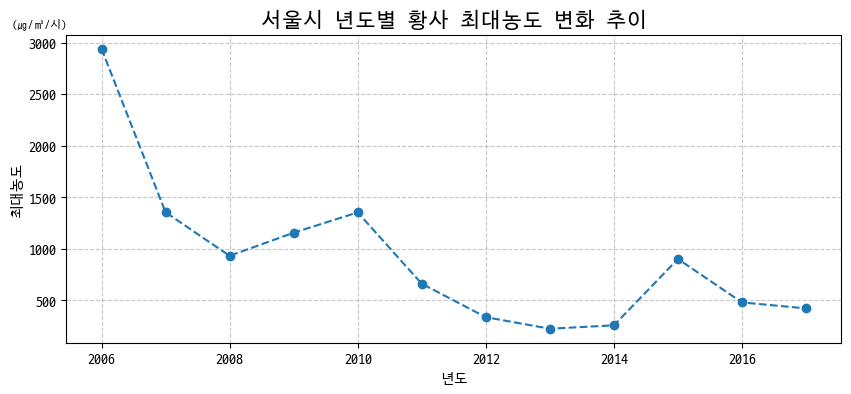

In [41]:
# 년도에 따른 최대농도 변화 추이
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
fig.text(0.07, 0.9, '(㎍/㎥/시)', fontsize=8)
ax.set_title('서울시 년도별 황사 최대농도 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_ylabel('최대농도')
ax.grid(True, linestyle='--', alpha=0.7)
ax.plot(df_.index, df_['최대농도'], marker='o', linestyle='--')
plt.show()

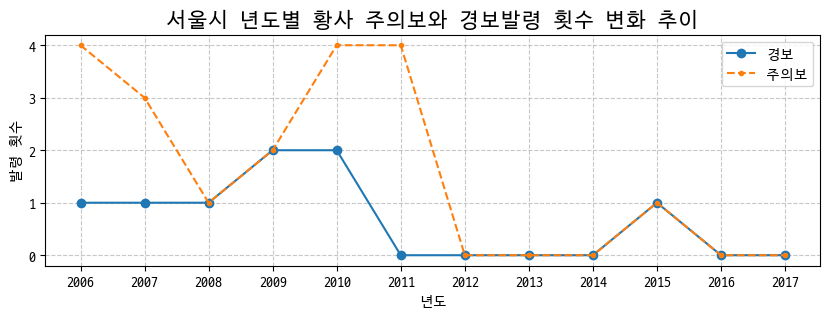

In [7]:
# 년도에 따른 주의보와 경보발령 횟수 변화 추이
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('서울시 년도별 황사 주의보와 경보발령 횟수 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_ylabel('발령 횟수')
ax.set_xticks(df_.index)
ax.set_yticks(range(5))
ax.grid(True, linestyle='--', alpha=0.7)
ax.plot(df_.index, df_['경보 발령횟수'], marker='o', linestyle='-', label='경보')
ax.plot(df_.index, df_['주의보 발령횟수'], marker='.', linestyle='--', label='주의보')
ax.legend()
plt.show()

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

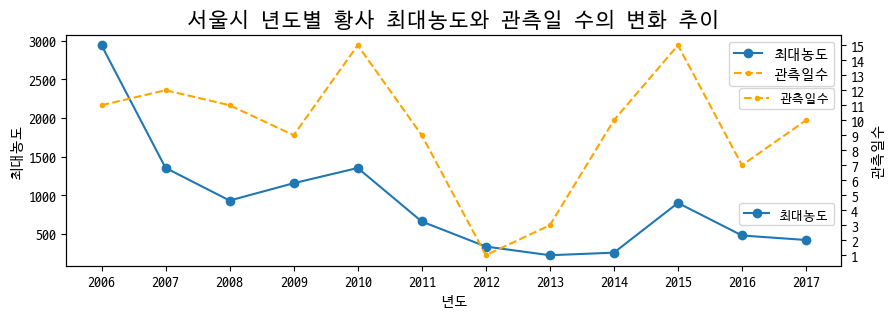

In [96]:
# 년도별 최대 농도와 관측일 수의 변화 추이
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('서울시 년도별 황사 최대농도와 관측일 수의 변화 추이', fontsize=15)
ax.set_xlabel('년도')
ax.set_xticks(df_.index)
ax.yaxis.tick_right()
ax.set_ylabel('최대농도')
ax.plot(df_.index, df_['최대농도'], marker='o', linestyle='-', label='최대농도')
ax_ = ax.twinx()            # x축을 공유하는 새로운 y축을 추가
ax_.set_ylabel('관측일수')
ax_.set_yticks(range(20))
ax_.plot(df_.index, df_['관측일수'], marker='.', linestyle='--', label='관측일수', c='orange')
# 범례 위치 조정
# 같은 axes가 아니기 때문에 각각의 범례를 따로 지정하거나 figure의 legend()를 사용할 수 있다.
fig.legend(bbox_to_anchor=(0.9, 0.88), loc='upper right',fontsize=10)

# bbox -> bounding box -> 범례 박스
# bbox_to_anchor=(x축 위치, y축 위치)로 범례 위치 조정
# x, y축은 왼쪽 아래가 (0, 0)이고 오른쪽 위가 (1, 1)이다.
# loc -> 범례 박스의 어느 부분을 기준으로 위치를 조정할 것인지 설정
ax.legend(bbox_to_anchor=(0.999, 0.15), fontsize=9, loc='lower right')
ax_.legend(bbox_to_anchor=(0.999, 0.65), fontsize=9, loc='lower right')
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
        

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = range(1, 1001, 50)
y = range(1, 1001, 50)
y2 = range(1000, 0, -50)

In [22]:
print(list(x))
print(list(y))
print(list(y2))

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]
[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]
[1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250, 200, 150, 100, 50]


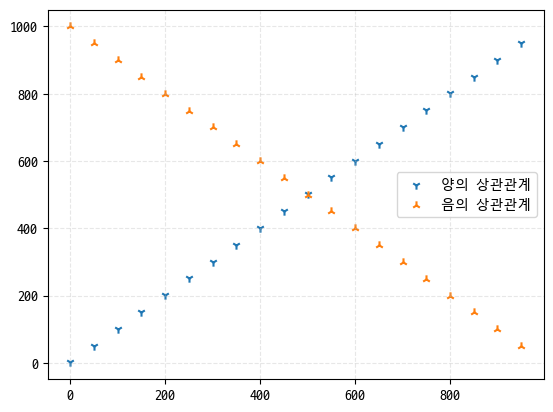

In [29]:
plt.grid(True, alpha=0.3, linestyle='--')
plt.scatter(x,y, marker='1', label='양의 상관관계')
plt.scatter(x,y2, marker='2', label='음의 상관관계')
plt.legend()
plt.show()

## 2.3 산점도 활용

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'./data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df[['carat', 'price']].head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

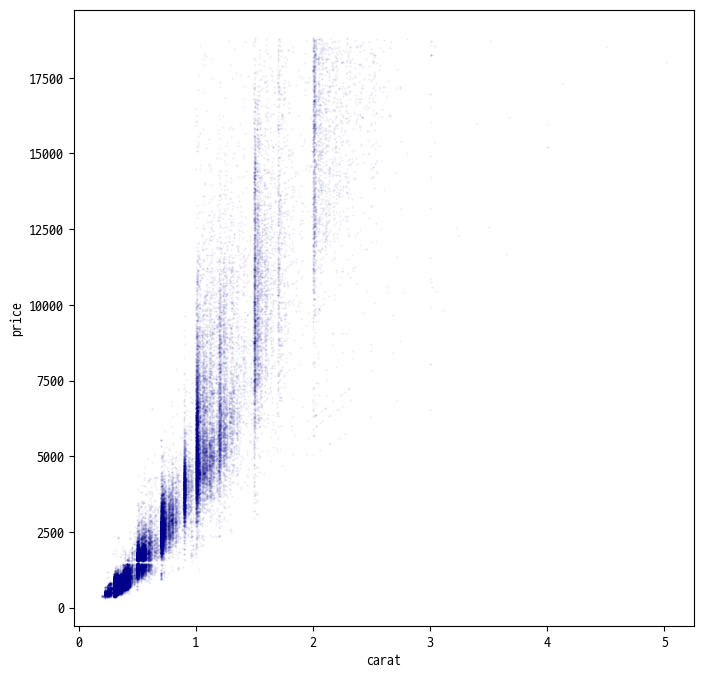

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(df['carat'], df['price'], s=1, marker='.', alpha=0.07, color='darkblue')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

In [14]:
# pandas에서 상관계수 구하기
df[['carat', 'price']].corr()

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [15]:
df_ = df.corr(numeric_only=True)

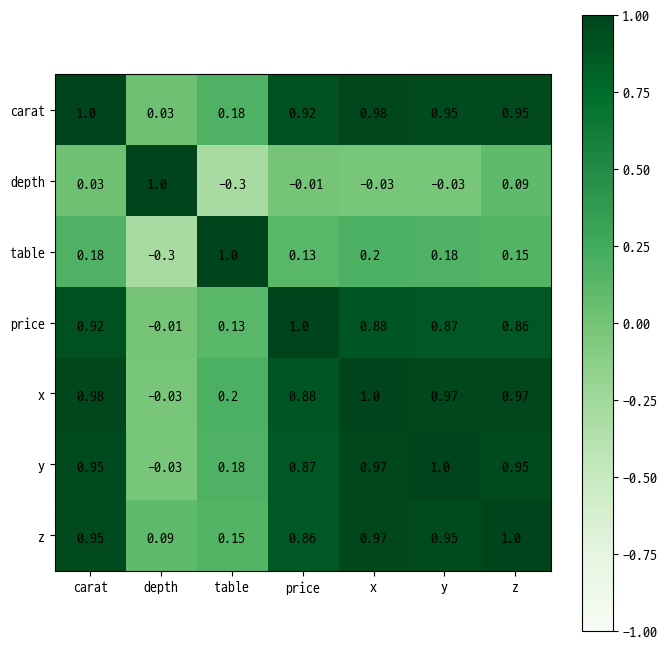

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(df_, vmin=-1, vmax=1, cmap='Greens')
plt.xticks(range(df_.columns.size), df_.columns)
plt.yticks(range(df_.columns.size), df_.columns)

# 상관계수를 text로 출력
for i in range(df_.columns.size):
    for j in range(df_.columns.size):
        plt.text(i-0.2, j+0.1, round(df_.iloc[i, j], 2), fontsize=10)

plt.colorbar()
plt.show()

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

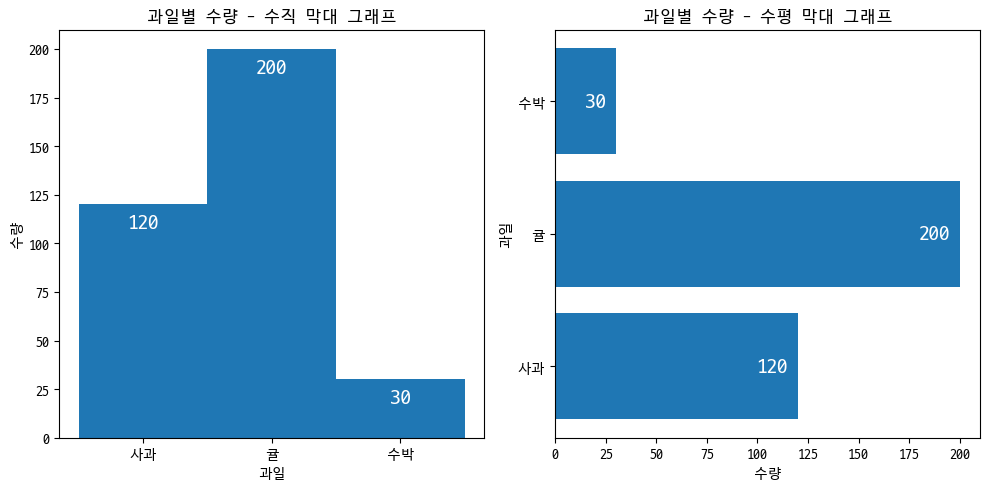

In [165]:
x = ['사과', '귤', '수박']
y = [120, 200, 30]

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
# width는 막대의 너비 -> 1: 꽉찬 막대 0: 아무것도 안보이는 막대
plt.bar(x, y, width=1) 
plt.xlabel('과일')
plt.ylabel('수량')
plt.title('과일별 수량 - 수직 막대 그래프')

# 수직 막대 그래프에 수량 표시하기
for i, f in enumerate(x):
    plt.text(f, y[i]-5, y[i], fontsize=15,  # x, y, text, fontsize
                                            # x: text의 x좌표(과일 이름 가능)
                                            # y: text의 y좌표(수량)
             color='white',                 # text 색상
             horizontalalignment='center',  # 수평 정렬 -> center, left, right
             verticalalignment='top')       # 수직 정렬 -> top, center, bottom

plt.subplot(1,2,2)
plt.barh(x, y)
plt.xlabel('수량')
plt.ylabel('과일')
plt.title('과일별 수량 - 수평 막대 그래프')

# 수평 막대 그래프에 수량 표시하기
for i, f in enumerate(x):
    plt.text(y[i]-5, f, y[i], fontsize=15,  # x, y, text, fontsize
                                            # x: text의 x좌표(수량)
                                            # y: text의 y좌표(과일 이름 가능)
             color='white',                 # text 색상
             horizontalalignment='right',  # 수평 정렬 -> center, left, right
             verticalalignment='center')    # 수직 정렬 -> top, center, bottom

plt.tight_layout()
plt.show()

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'./data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [172]:
mean_s = df[['x', 'y', 'z']].mean()
mean_s

x    5.731157
y    5.734526
z    3.538734
dtype: float64

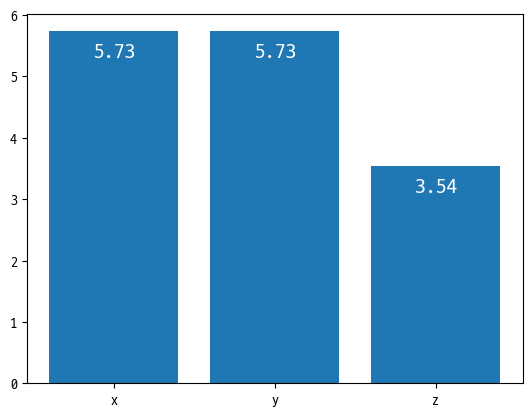

In [177]:
plt.bar(mean_s.index, mean_s.values)

for i, v in mean_s.items():
    plt.text(i, v-0.2, round(v, 2), fontsize=15, color='white', horizontalalignment='center', verticalalignment='top')
    
plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel(r'./data/강수량.xlsx', index_col='계절')
df.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


In [5]:
df_ = df.transpose()
df_.head()

계절,봄,여름,가을,겨울
2009,231.3,752.0,143.1,142.3
2010,302.9,692.6,307.6,98.7
2011,256.9,1053.6,225.5,45.6
2012,256.5,770.6,363.5,139.3
2013,264.3,567.5,231.2,59.9


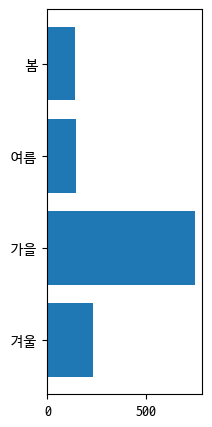

In [6]:
# 2009 계절별 강수량 비교
plt.figure(figsize=(2, 5))
plt.barh(df.index[::-1], df[2009])
plt.show()

In [7]:
from test_color.color_list import rand_hex_list_hsv

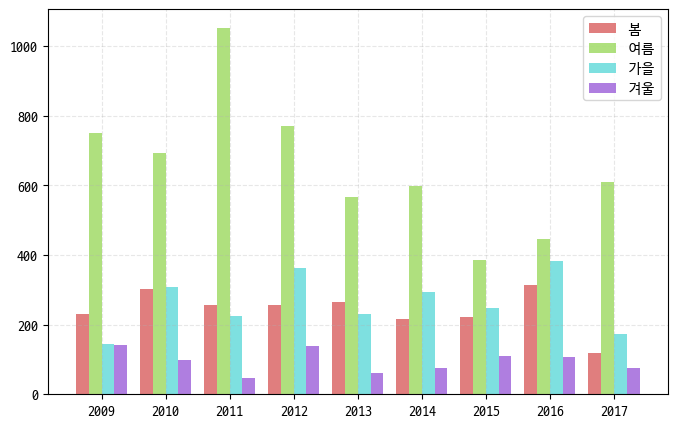

In [9]:
plt.figure(figsize=(8, 5))

colors = rand_hex_list_hsv(4, s=0.8, v=0.8)

seasons = [
    ('봄', -0.3, colors[0]), 
    ('여름', -0.1, colors[1]),
    ('가을', 0.1, colors[2]),
    ('겨울', 0.3, colors[3])
]

for season in seasons:
    plt.bar(df_.index + season[1] , # x좌표(계절별 간격 조정)
            df_[season[0]],         # bar의 높이
            width=0.2,              # bar의 너비
            label=season[0],        # 범례
            color=season[2],        # bar의 색상
            alpha=0.6               # bar의 투명도
            )

plt.xticks(df_.index)
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--')
plt.show()